# Méthodes Factorielles sur Python

#### Préambule 
L’analyse en composantes principales (ACP) est une technique factorielle où l’on essaie de résumer ou regrouper les descripteurs dans leurs dimensions les plus importantes représentées par des variables synthétiques appelées composantes ; comme une technique de visualisation où l’on essaie de préserver les proximités entre les individus dans un espace de représentation réduit ; comme une technique de compression de l’information ; etc.

Le succès de l’ACP repose en très grande partie sur la richesse des représentations graphiques qu’elle propose. Elle sont accompagnées d’outils d’aide à l’interprétation qui permettent de saisir la teneur des composantes (facteurs, axes factoriels) mises en évidence. Les très nombreux exemples illustratifs que l’on trouve ici ou là soulignent ses propriétés descriptives sur des jeux de données de taille réduite, elles permettent de mettre en relation les résultats observés avec des connaissances du domaine. Nous ne dérogerons pas à cette règle.

Mais le champ d’application de l’ACP est plus large. Elle joue un rôle important comme outil de défrichage des grandes bases de données, tant en nombre d’observations que de variables. En réduisant la dimensionnalité avec une perte d’information contrôlée, elle peut constituer une solution de prétraitement privilégiée avant l’utilisation des techniques de machine learning.

Son rôle complémentaire par rapport aux techniques de classification automatique (clustering) en particulier est souligné dans la littérature (Lebart et al., 2000)

#####  Principe de l’analyse en composantes principales
1. Tableau individus-variables

L’analyse en composantes principales traite les tableaux individus-variables, lesquelles sont toutes quantitatives. Nous utilisons le jeu de données « Autos » (Saporta, 2006 ; page 248). Il décrit les (p = 6) caractéristiques de (n = 18) véhicules des années 70.



In [3]:
import pandas as pd 

In [4]:
D = pd.read_excel("Data_Methodes_Factorielles_python.xlsx",sheet_name="DATA_ACP_ACTIF",index_col=0) 

In [5]:
D

,CYL,PUISS,LONG,LARG,POIDS,VMAX
Modele,,,,,,
Alfasud TI,1350,79,393,161,870,165
Audi 100,1588,85,468,177,1110,160
Simca 1300,1294,68,424,168,1050,152
Citroen GS Club,1222,59,412,161,930,151
Fiat 132,1585,98,439,164,1105,165
Lancia Beta,1297,82,429,169,1080,160
Peugeot 504,1796,79,449,169,1160,154
Renault 16 TL,1565,55,424,163,1010,140
Renault 30,2664,128,452,173,1320,180


Les questions qui viennent naturellement à l’esprit à la lecture de ce type de tableau sont :

**- Quels sont les véhicules qui se ressemblent ? Qui s’opposent ? Sur quelles caractéristiques (variables) sont fondées ces ressemblances et dissemblances.**

**- Quelles sont les relations entre les variables.**

1. 1 Analyse proximité des individus

Contentons-nous de traiter les variables CYL et PUISS dans un premier temps. Nous pouvons représenter les observations dans le plan.

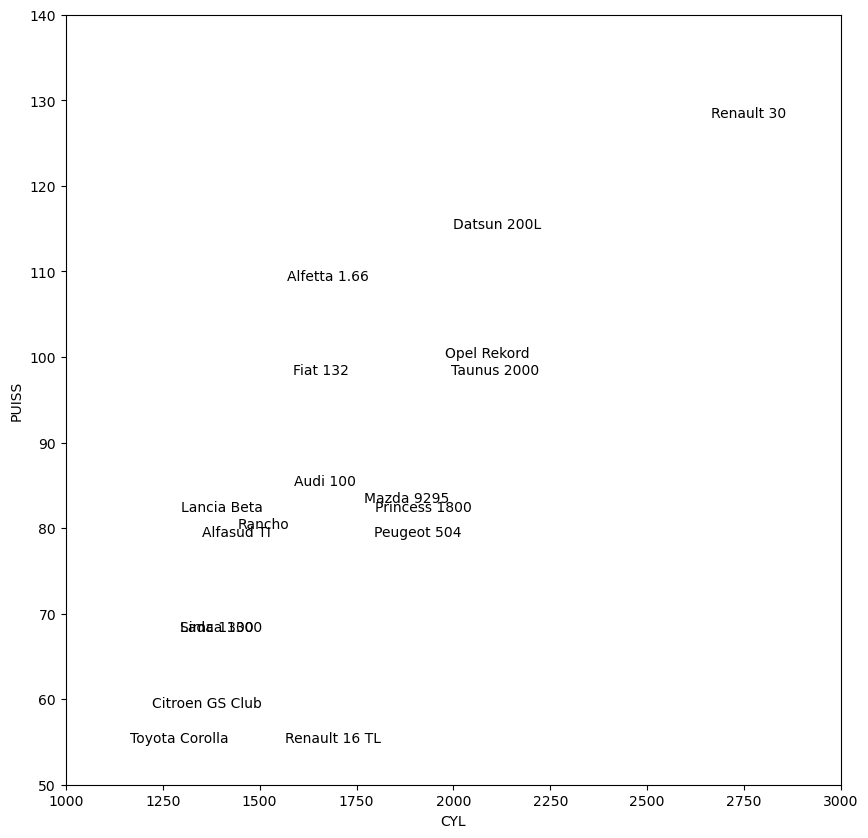

In [6]:
#importer la librairie graphique 

import matplotlib.pyplot as plt

#préparer le graphique 

fig, ax = plt.subplots(figsize=(10,10)) 
ax.plot(D.CYL,D.PUISS,"wo") 
ax.axis([1000,3000,50,140]) 
ax.set_xlabel("CYL") 
ax.set_ylabel("PUISS")

#ajouter les labels des véhicules
for i in D.index: 
    ax.text(D.CYL[i],D.PUISS[i],i) 

#faire afficher 

plt.show() 

**Quels commentaires pouvons-nous faire?**

**Faire ressortir les faits majeurs du graphique à partir d'un tableau réduit**

In [7]:
#afficher les deux variables en triant selon CYL 

Dbis = D.sort_values(by="CYL",ascending=True)[['CYL','PUISS']] 
print(Dbis)


                  CYL  PUISS
Modele                      
Toyota Corolla   1166     55
Citroen GS Club  1222     59
Lada 1300        1294     68
Simca 1300       1294     68
Lancia Beta      1297     82
Alfasud TI       1350     79
Rancho           1442     80
Renault 16 TL    1565     55
Alfetta 1.66     1570    109
Fiat 132         1585     98
Audi 100         1588     85
Mazda 9295       1769     83
Peugeot 504      1796     79
Princess 1800    1798     82
Opel Rekord      1979    100
Taunus 2000      1993     98
Datsun 200L      1998    115
Renault 30       2664    128


1. 2 Représentation des variables

Lorsque (p = 3), un graphique en 3 dimensions reste gérable, même s’il est moins lisible. Au-delà, nous sommes démunis. Quand elles ne sont pas trop nombreuses, on utilise souvent les « pairplot » qui sont constitués de nuages de points des variables prises deux à deux. Espérer y déceler des informations fines sur les proximités entre les individus est illusoire. Lire plusieurs cadrans simultanément n’est pas facile, et étiqueter les observations rendrait le tout totalement illisible. Ce type de graphique sert surtout à effectuer un diagnostic rapide des données : identifier les configurations incongrues (des blocs dans les observations par exemple), les liaisons fortes, ou encore la présence de points atypiques.



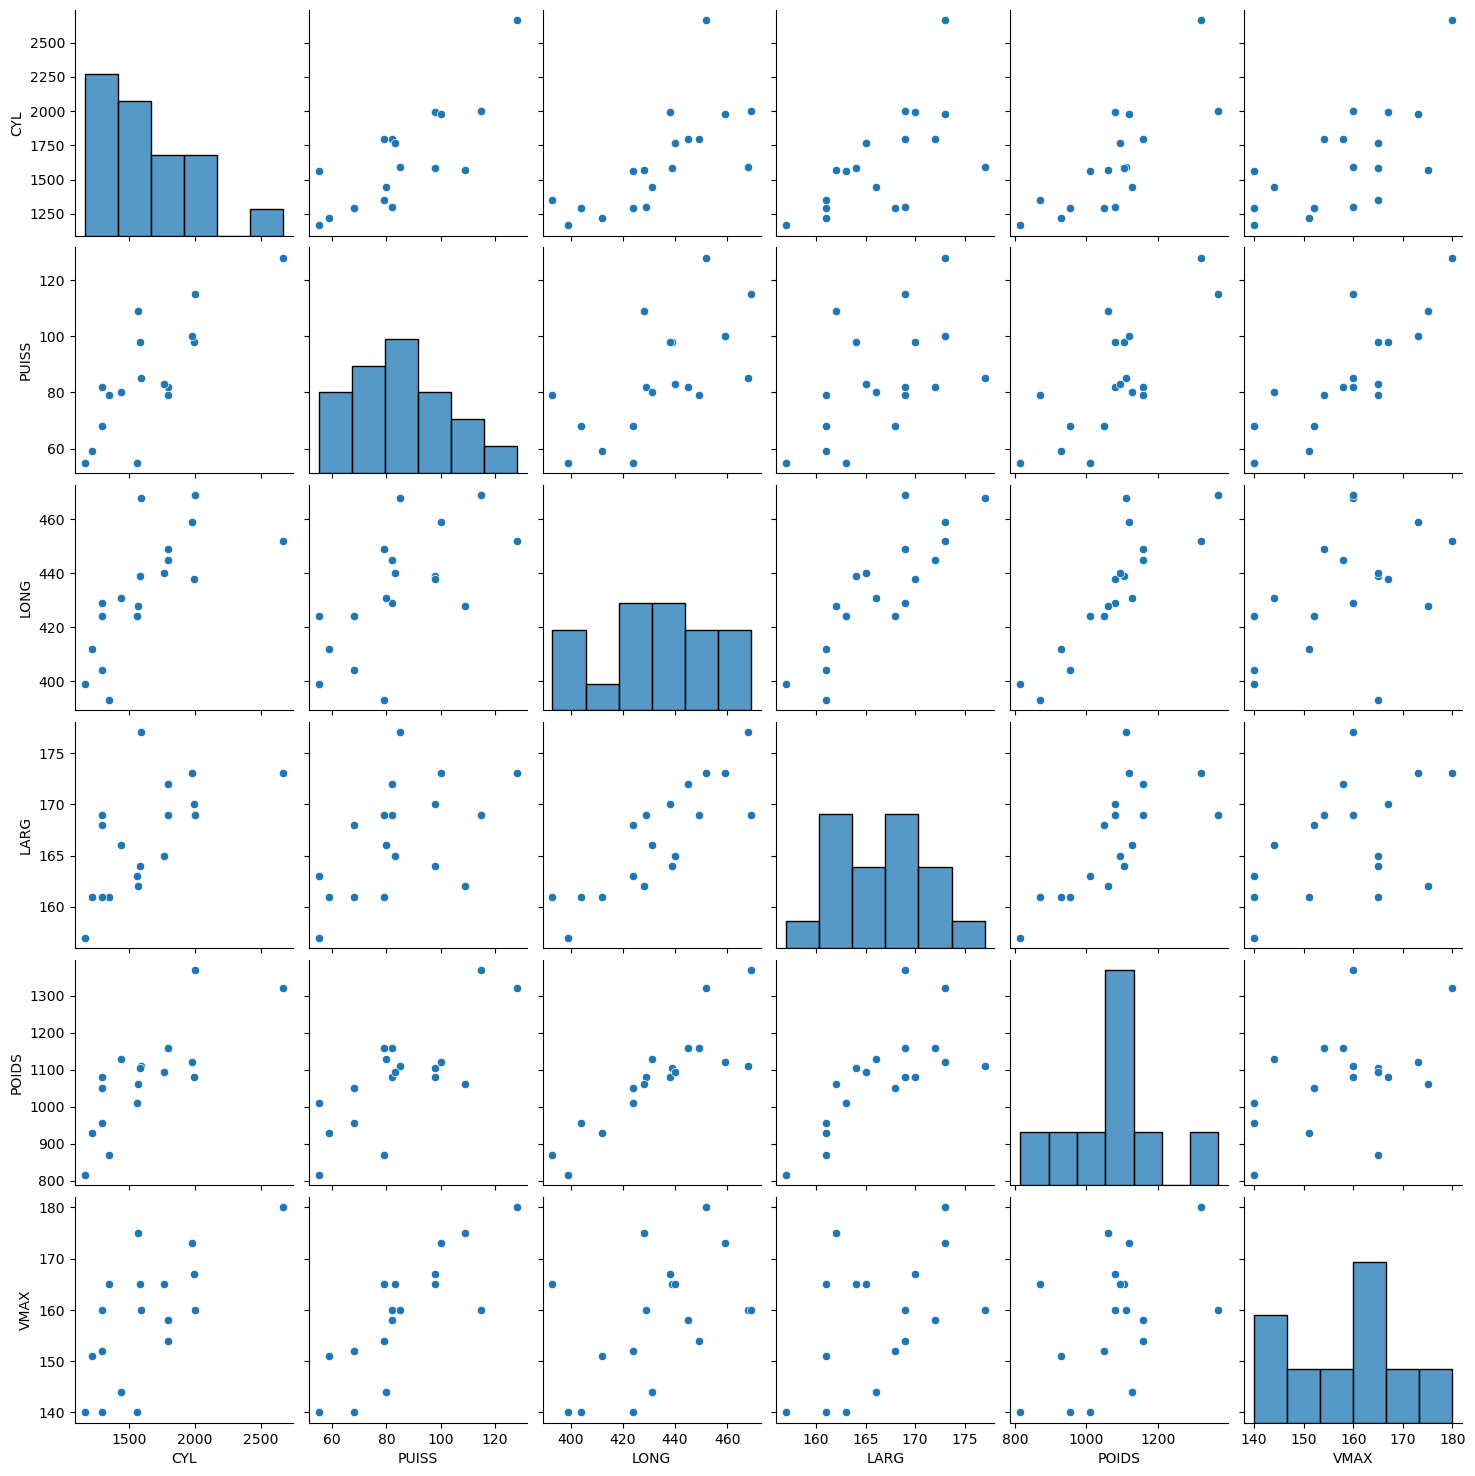

In [8]:
#librairie graphique 
import seaborn as sns 
# pairplot 
sns.pairplot(D)

L’analyse en composantes principales vise à réduire la dimensionnalité en créant des variables synthétiques, combinaisons linéaires des variables originelles, en nombre réduit (𝒒 ≪𝑝), tout en préservant au mieux l’information. On comprend l’idée. Mais encore faut-il pouvoir : 

- (1) définir et mesurer l’information véhiculée par les données ; 

- (2) quantifier la qualité de restitution du nouvel espace de représentation .

1. 2. 1 Distance entre indivis et Inertie

**Distance euclidienne**. 

La distance permet de mesure le degré d’éloignement entre les individus. La plus usuelle est la distance euclidienne. Entre deux individus (i1) et (i2), elle est définie comme suit :
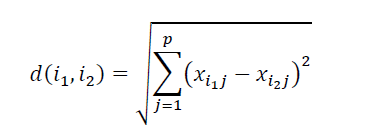

**Calculer les distances entre la « Audi 100 » et deux de ses voisins, la « Fiat 132 » et la « Mazda 9295 ».**

In [9]:
#librairie numpy pour les manipulations matricielles 
import numpy as np
#distance entre l'Audi et la Fiat 
np.sqrt(np.sum((Dbis.loc['Audi 100']-Dbis.loc['Fiat 132'])**2))

13.341664064126334

In [10]:
#distance entre l'Audi et la Mazda 
np.sqrt(np.sum((Dbis.loc['Audi 100']-Dbis.loc['Mazda 9295'])**2))

181.01104938649465

**Commentaire: Les résultats ne correspondent pas à l’impression visuelle ci-dessus (Figure 3). Contrairement à ce que l’on perçoit, l’Audi serait nettement plus proche de la Fiat que de la Mazda ?**

**Distance euclidienne pondérée**: 

Le hic vient de la différence d’unités entre les variables. La cylindrée est exprimée en cm3, la puissance en chevaux DIN. Les valeurs n’ont absolument pas la même amplitude. Les outils graphiques font une mise à l’échelle automatique sur l’étendue (max – min) qui masque cette disparité. Pour retrouver un mécanisme similaire dans le calcul des distances, une solution simple consiste à réduire les variables c.-à-d. à les diviser par leurs écarts-type respectifs. Cela revient à utiliser une distance euclidienne pondérée par l’inverse de la variance.


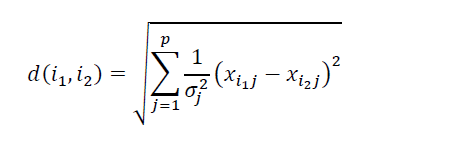

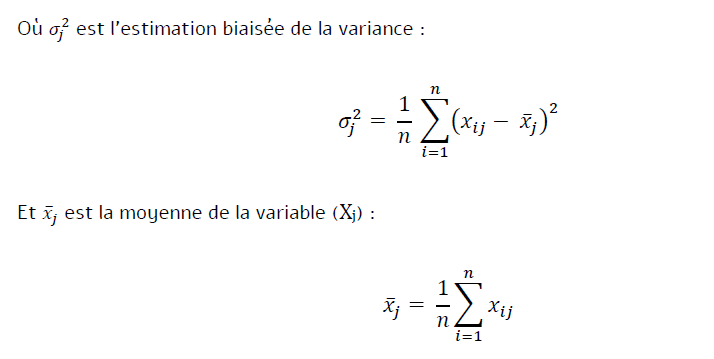

In [11]:
#matrice X numpy – plus facile à manipuler
X = Dbis.values 

#écarts-type des variables CYL et PUISS 

sigmas = np.std(X, axis=0, ddof=0)

print(sigmas)

[363.39449027  19.80218531]


In [12]:
#distance pondérée entre l'Audi et la Fiat 
np.sqrt(np.sum((1/sigmas**2)*(Dbis.loc['Audi 100']-Dbis.loc['Fiat 132'])**2))

0.6565451047185447

In [13]:
#distance entre l'Audi et la Mazda 
np.sqrt(np.sum((1/sigmas**2)*(Dbis.loc['Audi 100']-Dbis.loc['Mazda 9295'])**2))


0.5082182304292723

**Inertie – Version 1.**

La quantité d’information contenue dans un jeu de données peut être exprimée par l’inertie. Elle indique la dispersion totale des données. Elle peut être définie par la moyenne des carrés des distances entre paires d’observations.

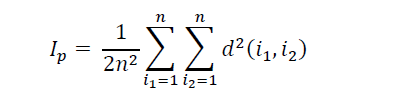

In [14]:
#nombre d'observations
n = X.shape[0] #18
#inertie version 1 -- distances entre paires d'individus 
Ip_v1 = 0
#double boucle (i1, i2) 
for i1 in range(n): 
    for i2 in range(n): 
        Ip_v1 = Ip_v1 + np.sum((X[i1,:]-X[i2,:])**2)
        
#moyenne des écarts entre paires d'individus 
Ip_v1 = (1/(2*n**2)) * Ip_v1 
print("Inertie, Approche 1 = %.2f" % (Ip_v1))

Inertie, Approche 1 = 132447.68


**Inertie – Version 2.** 

Une autre manière de considérer l’inertie est de la voir comme une généralisation multidimensionnelle de la variance. Elle exprime alors la dispersion autour du barycentre G du nuage de points, défini par le vecteur composé des moyennes des (p) variables 𝑥̅=(𝑥̅1,…,𝑥̅𝑝)

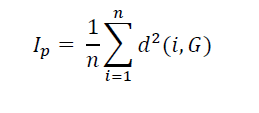

In [15]:
#moyennes des variables -- Coordonnées de G 
moyennes = np.mean(X,axis=0) 
print(moyennes) 


[1631.66666667   84.61111111]


/tmp/ipykernel_74835/2244367629.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([moyennes[0],D.CYL[i]],[moyennes[1],D.PUISS[i]],color='silver',linestyle='dashed')


Text(1631.6666666666667, 84.61111111111111, 'G')

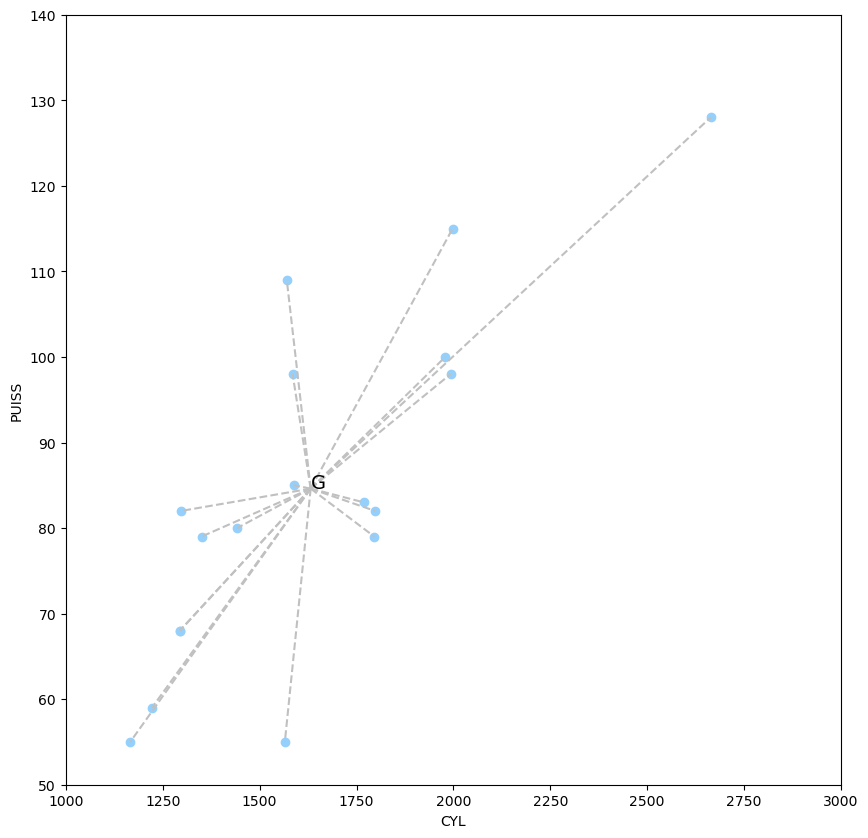

In [16]:
#graphique des points avec le barycentre G 
fig, ax = plt.subplots(figsize=(10,10)) 
ax.plot(D.CYL,D.PUISS,color='xkcd:light blue',marker='o',linestyle='None') 
ax.axis([1000,3000,50,140]) 
ax.set_xlabel("CYL") 
ax.set_ylabel("PUISS")
#ajouter des traits pointillés entre les points et le barycentre
for i in range(D.shape[0]):
    ax.plot([moyennes[0],D.CYL[i]],[moyennes[1],D.PUISS[i]],color='silver',linestyle='dashed') 
#barycentre G 
ax.text(moyennes[0],moyennes[1],"G",fontsize=14) 
#faire afficher plt.show()

**Etablir la matrice de covariance et corrélation sur numpy**

In [17]:
#former la matrice X avec (p=6) variables maintenant 
X = D.values 
#calculer la matrice de covariance 

#rowvar = False pour dire que les variables sont organisées en colonnes 

#ddof = 0 degré de liberté pour utiliser (1/n) 

V = np.cov(X,ddof=0,rowvar=False) 

#numpy.set_printoptions(precision=2,suppress=True)

print(V)

[[1.32055556e+05 5.73253704e+03 5.47655556e+03 1.18177778e+03
  3.81596111e+04 2.85087037e+03]
 [5.73253704e+03 3.92126543e+02 2.72861111e+02 5.32592593e+01
  2.01704630e+03 1.97274691e+02]
 [5.47655556e+03 2.72861111e+02 4.61583333e+02 9.42222222e+01
  2.48236111e+03 1.20638889e+02]
 [1.18177778e+03 5.32592593e+01 9.42222222e+01 2.66666667e+01
  4.92722222e+02 2.88148148e+01]
 [3.81596111e+04 2.01704630e+03 2.48236111e+03 4.92722222e+02
  1.77153611e+04 7.49990741e+02]
 [2.85087037e+03 1.97274691e+02 1.20638889e+02 2.88148148e+01
  7.49990741e+02 1.39200617e+02]]


In [18]:
V = np.cov(X,ddof=0,rowvar=False) 

np.set_printoptions(precision=2,suppress=True)

In [19]:
print(V)

[[132055.56   5732.54   5476.56   1181.78  38159.61   2850.87]
 [  5732.54    392.13    272.86     53.26   2017.05    197.27]
 [  5476.56    272.86    461.58     94.22   2482.36    120.64]
 [  1181.78     53.26     94.22     26.67    492.72     28.81]
 [ 38159.61   2017.05   2482.36    492.72  17715.36    749.99]
 [  2850.87    197.27    120.64     28.81    749.99    139.2 ]]


In [20]:
#matrice des corrélations

R = np.corrcoef(X,rowvar=False) 

print(R)

[[1.   0.8  0.7  0.63 0.79 0.66]
 [0.8  1.   0.64 0.52 0.77 0.84]
 [0.7  0.64 1.   0.85 0.87 0.48]
 [0.63 0.52 0.85 1.   0.72 0.47]
 [0.79 0.77 0.87 0.72 1.   0.48]
 [0.66 0.84 0.48 0.47 0.48 1.  ]]


In [21]:
#calculer la trace de la matrice R 
trace = R.trace() 
print(trace)

6.0


#### ACP sur la matrice de corrélation avec numpy et sklearn

**De manière générale, les vecteurs et valeurs propres de la matrice R (en ACP normée) constituent les solutions de l’ACP : les vecteurs propres sont deux à deux orthogonaux, ils fournissent directement les coefficients (ajk) définissant les composantes principales (Fk) ; les valeurs propres (λk) traduisent la variance restituée par les facteurs.**

In [22]:
#calcul des valeurs et vecteurs propres 

sol = np.linalg.eig(R) 

print(sol)

EigResult(eigenvalues=array([4.42, 0.86, 0.37, 0.21, 0.09, 0.04]), eigenvectors=array([[-0.42, -0.12, -0.35,  0.81,  0.15, -0.06],
       [-0.42, -0.42, -0.18, -0.36, -0.29, -0.63],
       [-0.42,  0.41,  0.07, -0.28,  0.73, -0.19],
       [-0.39,  0.45,  0.6 ,  0.21, -0.48, -0.11],
       [-0.43,  0.24, -0.48, -0.3 , -0.3 ,  0.58],
       [-0.36, -0.62,  0.49, -0.07,  0.19,  0.46]]))


In [23]:
#valeurs propres 
Vp=sol[0]
print(Vp)

[4.42 0.86 0.37 0.21 0.09 0.04]


In [24]:
#vecteurs propres 

print(sol[1][:,:])

[[-0.42 -0.12 -0.35  0.81  0.15 -0.06]
 [-0.42 -0.42 -0.18 -0.36 -0.29 -0.63]
 [-0.42  0.41  0.07 -0.28  0.73 -0.19]
 [-0.39  0.45  0.6   0.21 -0.48 -0.11]
 [-0.43  0.24 -0.48 -0.3  -0.3   0.58]
 [-0.36 -0.62  0.49 -0.07  0.19  0.46]]


In [25]:
# vecteurs propres du pour le premier facteur
print(sol[1][:,0])

[-0.42 -0.42 -0.42 -0.39 -0.43 -0.36]


In [26]:
# Calcul de sa norme 
print(np.linalg.norm(sol[1][:,0]))

0.9999999999999999


Est-ce que le repère factoriel est orthonormal ?
Pour le vérifier il faut faire le produit matriciel entre la transposé de matrice des vecteurs propres et la même matrice


In [27]:
print(np.dot(np.transpose(sol[1]),sol[1]))

[[ 1. -0. -0.  0. -0.  0.]
 [-0.  1.  0.  0.  0.  0.]
 [-0.  0.  1.  0. -0.  0.]
 [ 0.  0.  0.  1. -0. -0.]
 [-0.  0. -0. -0.  1.  0.]
 [ 0.  0.  0. -0.  0.  1.]]


Notons Z la matrice centré réduite

In [28]:
#vecteur moyenne pour (p = 6) variables 
moy = np.mean(X,axis=0)

In [29]:
print(moy)

[1631.67   84.61  433.5   166.67 1078.83  158.28]


In [30]:
#matrice Z des variables centrées
Z = X - moy

print(pd.DataFrame(Z, index=D.index))

                           0          1     2          3           4  \
Modele                                                                 
Alfasud TI       -281.666667  -5.611111 -40.5  -5.666667 -208.833333   
Audi 100          -43.666667   0.388889  34.5  10.333333   31.166667   
Simca 1300       -337.666667 -16.611111  -9.5   1.333333  -28.833333   
Citroen GS Club  -409.666667 -25.611111 -21.5  -5.666667 -148.833333   
Fiat 132          -46.666667  13.388889   5.5  -2.666667   26.166667   
Lancia Beta      -334.666667  -2.611111  -4.5   2.333333    1.166667   
Peugeot 504       164.333333  -5.611111  15.5   2.333333   81.166667   
Renault 16 TL     -66.666667 -29.611111  -9.5  -3.666667  -68.833333   
Renault 30       1032.333333  43.388889  18.5   6.333333  241.166667   
Toyota Corolla   -465.666667 -29.611111 -34.5  -9.666667 -263.833333   
Alfetta 1.66      -61.666667  24.388889  -5.5  -4.666667  -18.833333   
Princess 1800     166.333333  -2.611111  11.5   5.333333   81.16

In [31]:
#vecteur ecart-type pour (p = 6) variables 
sigma = np.std(X,axis=0)

In [32]:
print(sigma)

[363.39  19.8   21.48   5.16 133.1   11.8 ]


In [33]:
#centrage et réduction

Z = (X - moy)/sigma
print(Z)

[[-0.78 -0.28 -1.89 -1.1  -1.57  0.57]
 [-0.12  0.02  1.61  2.    0.23  0.15]
 [-0.93 -0.84 -0.44  0.26 -0.22 -0.53]
 [-1.13 -1.29 -1.   -1.1  -1.12 -0.62]
 [-0.13  0.68  0.26 -0.52  0.2   0.57]
 [-0.92 -0.13 -0.21  0.45  0.01  0.15]
 [ 0.45 -0.28  0.72  0.45  0.61 -0.36]
 [-0.18 -1.5  -0.44 -0.71 -0.52 -1.55]
 [ 2.84  2.19  0.86  1.23  1.81  1.84]
 [-1.28 -1.5  -1.61 -1.87 -1.98 -1.55]
 [-0.17  1.23 -0.26 -0.9  -0.14  1.42]
 [ 0.46 -0.13  0.54  1.03  0.61 -0.02]
 [ 1.01  1.53  1.65  0.45  2.19  0.15]
 [ 0.99  0.68  0.21  0.65  0.01  0.74]
 [-0.52 -0.23 -0.12 -0.13  0.38 -1.21]
 [ 0.38 -0.08  0.3  -0.32  0.12  0.57]
 [ 0.96  0.78  1.19  1.23  0.31  1.25]
 [-0.93 -0.84 -1.37 -1.1  -0.93 -1.55]]


In [34]:
#outil pour l'ACP
from sklearn.decomposition import PCA 
acp = PCA()

In [35]:
#coordonnées factorielles
coord = acp.fit_transform(Z)

In [36]:
#afficher les nouvelles coordonnées 

print(pd.DataFrame(coord, index=D.index))

                        0         1         2         3         4         5
Modele                                                                     
Alfasud TI      -2.138924  1.785681  0.571862  0.201927 -0.301357 -0.053921
Audi 100         1.561459 -1.527040  1.315271 -0.211352  0.148516  0.327238
Simca 1300      -1.119385 -0.674505  0.456588 -0.167626 -0.375364 -0.271803
Citroen GS Club -2.573742  0.112884  0.148570 -0.017343  0.226853 -0.263476
Fiat 132         0.427855  0.695567 -0.193286 -0.627754  0.263505  0.037153
Lancia Beta     -0.304238 -0.196149  0.675803 -0.555941 -0.445086 -0.200083
Peugeot 504      0.683928 -0.933057 -0.256823  0.203134  0.208652 -0.153892
Renault 16 TL   -1.948493 -0.980448 -0.619575  0.630319  0.293165 -0.108642
Renault 30       4.409735  1.063633 -0.593528  0.847248 -0.374890 -0.043997
Toyota Corolla  -3.985782  0.236240 -0.303133  0.265122  0.278428  0.328892
Alfetta 1.66     0.437658  1.912448  0.024942 -0.758910  0.168103  0.054241
Princess 180

Text(0, 0.5, 'Comp.2 (10.17%)')

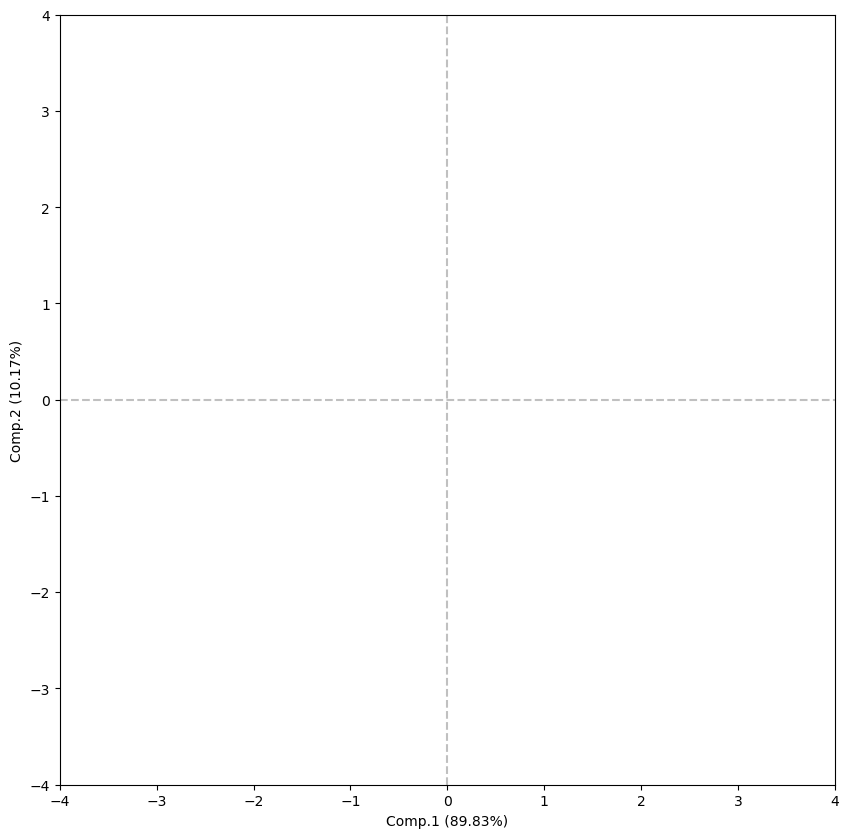

In [37]:
#position des véhicules dans le repère factoriel 
fig, ax = plt.subplots(figsize=(10,10)) 
ax.plot(coord[:,0],coord[:,1],"wo") 
ax.axis([-4,+4,-4,+4]) 
ax.plot([-4,+4],[0,0],color='silver',linestyle='--') 
ax.plot([0,0],[-4,+4],color='silver',linestyle='--') 
ax.set_xlabel("Comp.1 (89.83%)") 
ax.set_ylabel("Comp.2 (10.17%)")

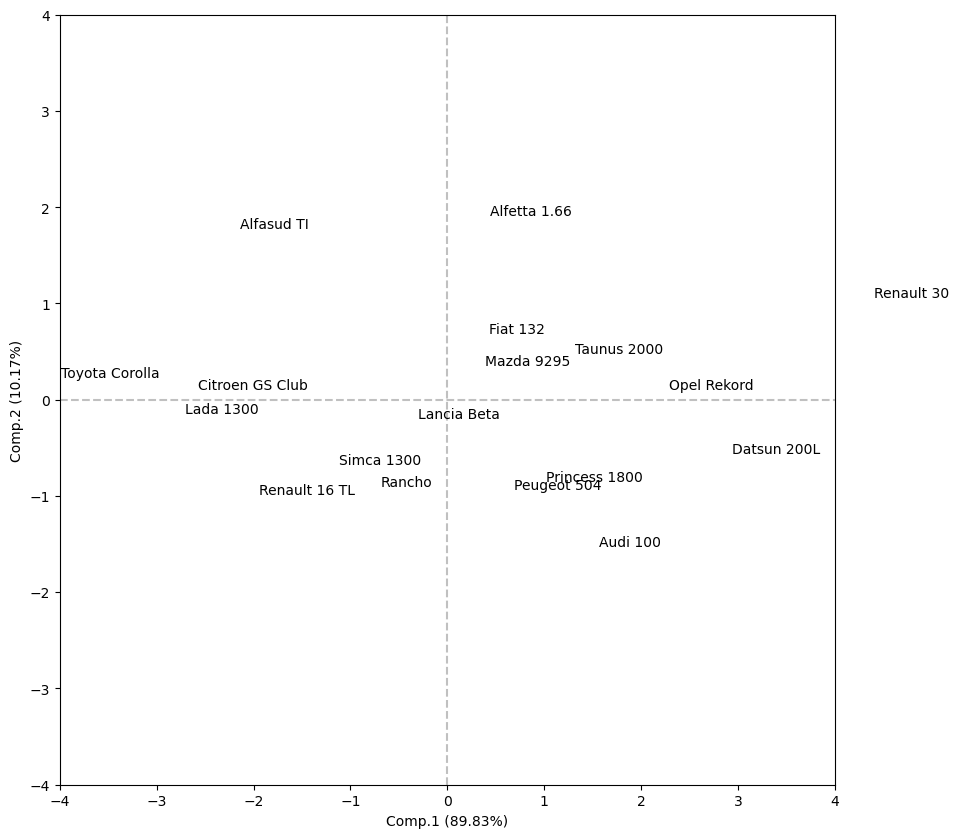

In [38]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax.plot(coord[:,0],coord[:,1],"wo") 
ax.axis([-4,+4,-4,+4]) 
ax.plot([-4,+4],[0,0],color='silver',linestyle='--') 
ax.plot([0,0],[-4,+4],color='silver',linestyle='--') 
ax.set_xlabel("Comp.1 (89.83%)") 
ax.set_ylabel("Comp.2 (10.17%)")

#ajouter les labels des véhicules 
for i in range(n): 
    ax.text(coord[i,0],coord[i,1],D.index[i])
    
plt.show()